# Data Cleansing and Preparation:
## The following data cleansing and preparation steps were followed by the work in the source below:
### https://www.kaggle.com/code/chethuhn/anomaly-detection-in-network-dataset
## The Support Vector Regression Machine model implementation, analysis, and evaluation are unique to this notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("../../../data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
## list of columns
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
## Types of dtypes present in the dataframe
set(list(df.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [6]:
## to identify which columns has the "Object" data
categorical_columns=[col for col in df.columns if df[col].dtype=="O"]
categorical_columns

[' Label']

In [7]:
## Categorical Data
df_Categorical=df[categorical_columns]
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
191028,BENIGN
191029,BENIGN
191030,BENIGN
191031,BENIGN


In [8]:
# Numerical data
df_Numerical=df.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)
## cols = df.select_dtypes(include=['float64','int64']).columns

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


( Label
 BENIGN    189067
 Bot         1966
 Name: count, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

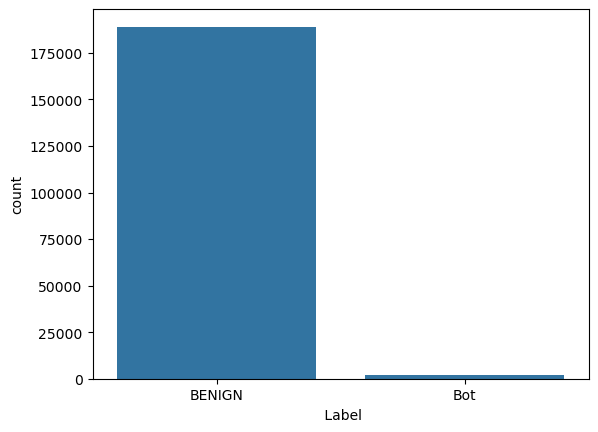

In [9]:
##  To check the Counts of each Class in the dependent Variable
df_Categorical[" Label"].value_counts(),sns.countplot(x=df_Categorical[' Label'])

In [10]:
## To check Unique values in the data 
for i in df_Numerical.columns:
    #if df[i].unique()<
    print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

  Destination Port Column has 16089 unique values and those are [ 3268   389     0 ...  4997 33279 33280]


  Flow Duration Column has 91470 unique values and those are [112740690 112740560 113757377 ...  60921076 116036371     16842]


  Total Fwd Packets Column has 505 unique values and those are [    32    545     22      4      7      1      9     13     11     21
     20      2     25      3     48     46    460    388      6     49
    206     14     24     19     27    124    360     12     10      8
    132      5     33    270     15     39    171     16     43     64
    380    108     36     17     38     35    264    252     28     18
     96     29     82     23    156   1161    468     98     53    343
   3694   1227    120     41     68     52     30     26     37    653
     62     54     55     47    106     57    138     86     83     67
    131     79     69     45   1303     63    105    118     81     40
    134     34     31     70     72     61     74   3799    2

In [11]:
for i in df_Numerical.columns:
    if df[i].isnull().sum()>0:
        print(i)

Flow Bytes/s


In [12]:
## We are having nan values in this column
df_Numerical["Flow Bytes/s"].isnull().sum()

28

In [13]:
## To check the dependent column data , when the data is nan
#nan_rows = df[df["Flow Bytes/s"].isnull()]
for index, row in df_Numerical.iterrows():
    if pd.isna(row["Flow Bytes/s"]):
        print(row["Flow Bytes/s"],df_Categorical[" Label"].iloc[index])

nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN


## from the above data we can see that Dependent column data for missing rows are Normal or BENIGN , so we are going to delete all rows ,because it is only small numbers, Total 28 Rows of missing rows are deleted

In [14]:
## Drop the nan values 
df_Numerical.dropna(inplace=True)

## To check the  Dataframe has infinte values or not

In [15]:

## To check this funtion all columns should be numerical data types like int,float  should not include "Object datatype"
np.all(np.isfinite(df_Numerical.values))

False

### From this we funtion , the data contains np.inf value ie, Infinity value in the data

In [16]:
## To check total sum of the infinite values in the data
np.isinf(df_Numerical).values.sum()
## To check all values of dataframe are finite
#np.all(np.isfinite(df.values))
#np.all(np.isinf(df))

188

## Count how many of these values belongs to BENIGN OR BOT

In [17]:
#infintie_column_list=[]
#count={}
#list1=df_Numerical.columns
#for index,row in df_Numerical.iterrows():
 #   for j in list1:
  #      if np.isfinite(row[j])==False:
 #           infintie_column_list.append(j)
  #          count[j]=
    #        print(f" This column '{j}' has infinity value in {index} ,this looks like {row[j]}\n")#

In [18]:
#infinite_column_list = []

# Iterate through the rows of the DataFrame
#for index, row in df_Numerical.iterrows():
 #   for column in df_Numerical.columns:
#        if not np.isfinite(row[column]):
            # Add the column name to the list of columns with infinite values
  #          infinite_column_list.append(column)
            #print(f"Row {index}: Column '{column}' has infinite value: {row[column]}")

# Remove duplicates from the list of columns with infinite values
#infinite_column_list = list(set(infinite_column_list))

# Print the list of columns with infinite values
#print("\nColumns with infinite values:")
#print(infinite_column_list)


## To know which columns have ifninity values and how many numbers are there and also their index number 

In [19]:
import numpy as np

infinite_column_count = {}  # Dictionary to store counts
infinite_Value_index_num = []  # List to store index numbers

# Iterate through the columns
for column in df_Numerical.columns:
    count = 0  # Initialize count for the current column
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value):
            count += 1  # Increment count for non-numeric (infinite) values
            infinite_Value_index_num.append(index)  # Append the index number
    if count > 0:
        infinite_column_count[column] = count  # Store count in the dictionary

# Convert the list of index numbers to a set to remove duplicates
infinite_Value_index_num = set(infinite_Value_index_num)

# Print the dictionary and the set of index numbers
print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)


Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 94, ' Flow Packets/s': 94}

Index numbers of non-numeric (infinite) values:
{11778, 188931, 163844, 57872, 134161, 99347, 121373, 51746, 135208, 105006, 134190, 168500, 106551, 4153, 64057, 117825, 143945, 604, 106596, 87655, 48239, 38005, 13950, 61066, 170122, 75916, 76428, 106638, 4752, 25233, 186009, 28314, 81055, 118442, 29367, 90305, 85699, 3786, 118987, 70348, 190155, 75983, 14039, 12503, 39129, 172761, 37606, 41704, 23785, 42730, 112367, 116984, 83704, 127745, 145671, 61710, 24344, 13093, 107301, 79148, 41265, 40756, 68916, 110916, 33623, 36700, 100188, 14183, 9581, 63853, 114031, 4466, 131978, 30603, 31115, 161688, 154012, 37281, 47522, 126379, 34223, 113071, 124338, 33718, 177098, 45515, 132555, 173003, 16846, 17874, 40405, 33773, 34802, 125944}


In [20]:
Benign=0
bot=0
for i in infinite_Value_index_num:
    if df_Categorical[" Label"].iloc[i]=="BENIGN":
        Benign+=1
    else:
        bot+=1
        
print(f" Benign counts are {Benign}\n\n")
print(f" bot counts are {bot}")

 Benign counts are 94


 bot counts are 0


## Since we only have 188 rows which has "inf" data , Compared to all the data we have , this data is less so we can delete the rows 
Note: We can try to replace this values with Maximum value based on accuracy of the model

In [21]:
## Replace the infinite values with nan values and then delete each row 
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [22]:
## To confirm once again is there any nan or infinite values
## To check total sum of the infinite values in the data
#np.isinf(df_Numerical).values.sum(),np.any(np.isnan(df_Numerical))
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [23]:
# To check is there any nan values 
#np.any(np.isnan(df)),  np.all(np.isfinite(df))
#np.isfinite(df[' Destination Port'].iloc[1])

### There is no nan values and there are all finite values

In [24]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [25]:
df_Numerical.shape,df_Categorical.shape

((190911, 78), (191033, 1))

### Since we have deleted some rows in the Numerical data, we want that data in the Categorical data ,Thats why the rows size is different in both

In [26]:
# Create a list of index numbers from df_Numerical
index_numbers_to_fetch = df_Numerical.index.tolist()

# Fetch the corresponding rows from df_Categorical
df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

# df_Categorical_subset now contains the rows from df_Categorical that correspond to the index numbers in df_Numerical

In [27]:
df_Categorical.shape

(190911, 1)

## Convert the Dependent data into Numerical using One hot Encoding 

In [28]:
## Dependent data 
y=pd.get_dummies(data=df_Categorical[" Label"], drop_first=True)
y

,Bot
0,False
1,False
2,False
3,False
4,False
...,...
191028,False
191029,False
191030,False
191031,False


In [29]:
# Independent data
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


## we can see that all features values are in different scaling , so we can scale down using min max scaler or Standarization

In [30]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

In [31]:
df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.050317,0.939506,0.000149,0.000056,0.005220,1.837321e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,2.380559e-07,0.000004,3.235849e-06,0.134167,0.006512,0.136667,0.128333
1,0.005989,0.939505,0.000149,0.000056,0.005220,8.063796e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,3.124006e-07,0.000003,2.688679e-06,0.134167,0.006512,0.136667,0.128333
2,0.000000,0.947978,0.002616,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.088319,1.453303e-01,0.178302,1.792453e-07,0.101667,0.090546,0.173333,0.045875
3,0.082451,0.000834,0.000101,0.000000,0.000499,0.000000e+00,0.001128,0.012043,0.004713,0.000000,...,0.000106,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000456,0.000014,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190906,0.000816,0.000512,0.000014,0.000007,0.000146,5.645933e-07,0.001813,0.019355,0.007575,0.000000,...,0.000015,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190907,0.000816,0.000002,0.000005,0.000007,0.000065,4.338118e-07,0.001612,0.017204,0.006733,0.000000,...,0.000005,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190908,0.000816,0.000002,0.000005,0.000007,0.000073,5.645933e-07,0.001813,0.019355,0.007575,0.000000,...,0.000005,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190909,0.001894,0.000140,0.000000,0.000004,0.000039,7.655502e-08,0.001934,0.020645,0.008080,0.000000,...,0.000000,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [32]:
## Dependent data
X=df_Numerical_Scaled_data

# Cross-Validation and Classification Metrics Analysis
This code performs 10-fold cross-validation on a dataset using various configurations of Support Vector Classifier (SVC) models, evaluating their performance with accuracy, confusion matrix, and classification report.

1. SVC Configurations:
- Linear Kernel SVC: Assumes a linear boundary between classes in the feature space.
- RBF Kernel SVC: Uses the Radial Basis Function to capture non-linear boundaries between classes by mapping features into a higher-dimensional space.
- Polynomial Kernel SVC: Uses polynomial decision boundaries, allowing the model to capture more complex class relationships.

2. Cross-Validation:
- The `cross_val_predict` function is used to perform 10-fold cross-validation, where the dataset is split into 10 subsets. The model is trained on 9 subsets and evaluated on the remaining subset, repeating this process across all 10 folds.
- This process ensures robust evaluation by assessing the model's generalization performance across different data splits.

3. Evaluation Metrics:
- Accuracy: Measures the proportion of correctly classified instances out of the total instances. The mean accuracy across all 10 folds is calculated, providing a measure of the model's overall performance.
- Confusion Matrix: Provides a breakdown of true positive, true negative, false positive, and false negative predictions, giving insight into how well the model distinguishes between the classes.
- Classification Report: Offers detailed metrics including precision, recall, F1-score, and support for each class, helping to assess the quality of predictions for each class individually.

By applying 10-fold cross-validation and calculating accuracy, confusion matrix, and classification metrics, this code evaluates how well each SVC model performs on classification tasks, allowing for comparison between different kernel functions (linear, RBF, and polynomial).

============================== SVC with linear kernel Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.9902577  0.99224766 0.99277146 0.99292861 0.99350479 0.99319051
 0.99214289 0.99392384 0.99680478 0.99732858]
Mean Accuracy across folds: 0.9935
Model Accuracy (combined prediction): 99.35%
Confusion Matrix:
 [[188473    482]
 [   757   1199]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    188955
        True       0.71      0.61      0.66      1956

    accuracy                           0.99    190911
   macro avg       0.85      0.81      0.83    190911
weighted avg       0.99      0.99      0.99    190911




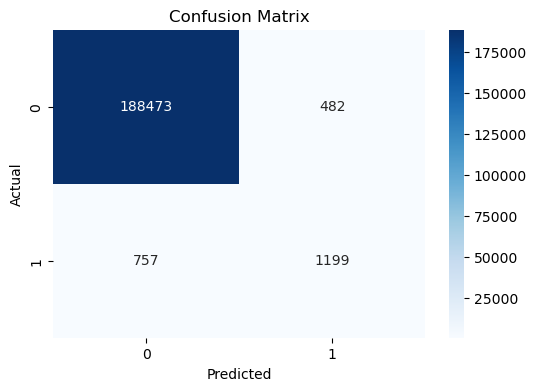

============================== SVC with RBF kernel Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.99271946 0.99450003 0.99450003 0.99381908 0.99392384 0.99434288
 0.99355717 0.99717144 0.99989524 0.989681  ]
Mean Accuracy across folds: 0.9944
Model Accuracy (combined prediction): 99.44%
Confusion Matrix:
 [[188877     78]
 [   989    967]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00    188955
        True       0.93      0.49      0.64      1956

    accuracy                           0.99    190911
   macro avg       0.96      0.75      0.82    190911
weighted avg       0.99      0.99      0.99    190911




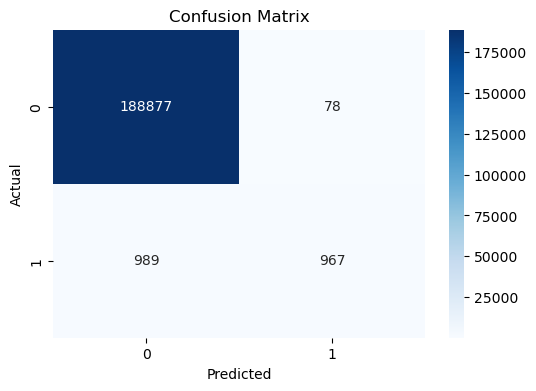

============================== SVC with polynomial kernel Cross-Validation Evaluation ==============================
Accuracy for each fold: [0.99250995 0.99465717 0.99486669 0.99491907 0.99476193 0.99481431
 0.99470955 0.99711906 0.99994762 0.99984286]
Mean Accuracy across folds: 0.9958
Model Accuracy (combined prediction): 99.58%
Confusion Matrix:
 [[188897     58]
 [   741   1215]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    188955
        True       0.95      0.62      0.75      1956

    accuracy                           1.00    190911
   macro avg       0.98      0.81      0.88    190911
weighted avg       1.00      1.00      1.00    190911




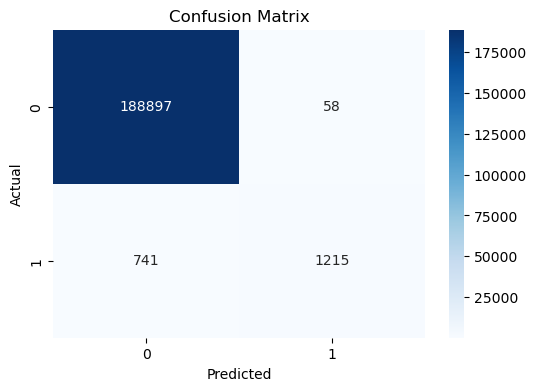

In [36]:
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Assuming X is your feature matrix and y is your target variable (classification labels)
#X = df[selected_features]
#y = df['target_variable']

# Define different SVC models with various kernels for classification tasks
models = [
    ('SVC with linear kernel', SVC(kernel='linear', C=1, random_state=0)),
    ('SVC with RBF kernel', SVC(kernel='rbf', C=1, gamma=0.1, random_state=0)),
    ('SVC with polynomial kernel', SVC(kernel='poly', degree=3, C=1, random_state=0))
]

# Function to evaluate the SVC model using cross-validation for classification
def evaluate_model_cv_classification(model, X, y, model_name):
    # Get predictions using cross-validation
    y_pred = cross_val_predict(model, X, y, cv=10, n_jobs=-1)
    
    # Calculate Accuracy, Confusion Matrix, and Classification Report
    accuracy = accuracy_score(y, y_pred)
    confusion_matrix_result = confusion_matrix(y, y_pred)
    classification = classification_report(y, y_pred)
    
    # Perform 10-fold cross-validation to get accuracy for each fold
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
    
    # Print evaluation results
    print(f'============================== {model_name} Cross-Validation Evaluation ==============================')
    
    # Print accuracy for each fold and the mean accuracy
    print(f"Accuracy for each fold: {scores}")
    print(f"Mean Accuracy across folds: {np.mean(scores):.4f}")
    
    # Print overall evaluation using combined cross-validation predictions
    print(f'Model Accuracy (combined prediction): {accuracy * 100:.2f}%')
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Classification Report:\n', classification)
    print()

    #Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()


# Iterate through each SVC model and evaluate using cross-validation
for model_name, model in models:
    evaluate_model_cv_classification(model, X, y, model_name)